In [4]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"

$$P(y|x_1 ... x_n) = \frac{\prod_{i=1}^{n}P(x_i|y) P(y)}{P(x_1 ... x_n)}$$

$$P(y|x.cont) = \frac{\prod_{i=1}^{n}P(x.cont_i|y) P(y)}{P(x.cont_1 ... x.cont_n)}$$

$$P(y|x.cat) = \frac{\prod_{j=1}^{m}P(x.cat_j|y) P(y)}{P(x.cat_1 ... x.cat_m)}$$

$$P(y|x.cont;x.cat) =  \frac{\prod_{i=1}^{n}P(x.cont_i|y) \prod_{j=1}^{m}P(x.cat_j|y) P(y)}{P(x.cat_1 ... x.cat_m)}$$

$$P(y|x) =  \frac{P(y|x.cont) P(y|x.cat)}{P(y)} \frac{1}{c''}$$

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [6]:
data_columns = ['quality', 'alcohol', 'malic_acid', 'ash', 
                'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
                'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 
                'hue', 'OD280_OD315_of_diluted_wines', 'proline']

data = pd.read_csv("wine.data", header = None)

data.columns = data_columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quality                       178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  proli

In [7]:
data.dtypes

quality                           int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
OD280_OD315_of_diluted_wines    float64
proline                           int64
dtype: object

In [8]:
data.quality.value_counts()

2    71
1    59
3    48
Name: quality, dtype: int64

In [9]:
data.shape

(178, 14)

In [10]:
data.head()

,quality,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
data_example = data.copy()

In [12]:
data_example.head()

,quality,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
n = 4
columns_to_discretize = list(data_example.columns[n:])#.values)
columns_cont = list(data_example.columns[1:n])#.values)
columns_to_discretize

['alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'OD280_OD315_of_diluted_wines',
 'proline']

In [14]:
for i in columns_to_discretize:
    try:
        data_example.loc[:,i] = pd.qcut(data_example.loc[:,i],3,labels=range(3))
        #print(i)
    except:
        columns_to_discretize.remove(i)
        columns_cont.append(i)
        #print(f'failed at {i}')

print('columns cont:', columns_cont)
print('columns dicrete:', columns_to_discretize)
print('columna usadas: ', len(columns_cont) + len(columns_to_discretize))

columns cont: ['alcohol', 'malic_acid', 'ash']
columns dicrete: ['alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280_OD315_of_diluted_wines', 'proline']
columna usadas:  13


In [15]:
X = data_example.drop(['quality'], axis=1)
Y = data_example['quality']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

In [17]:
gnb = GaussianNB()

gnb.fit(X_train.loc[:,columns_cont], Y_train)

GaussianNB()

In [18]:
mnb = MultinomialNB()

mnb.fit(X_train.loc[:,columns_to_discretize], Y_train)

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

In [ ]:
predict_proba_gnb = gnb.predict_proba(X_train.loc[:,columns_cont])

predict_proba_mnb = mnb.predict_proba(X_train.loc[:,columns_to_discretize])

In [ ]:
y_probas = Y_train.value_counts(normalize=True).sort_index()
y_probas

1    0.354839
2    0.395161
3    0.250000
Name: quality, dtype: float64

In [ ]:
gnb.classes_

array([1, 2, 3], dtype=int64)

In [ ]:
predict_proba_gnb[0:3]

array([[0.1065515 , 0.00779939, 0.88564911],
       [0.00489954, 0.8113061 , 0.18379437],
       [0.23537934, 0.58923187, 0.17538879]])

In [ ]:
predict_proba_mnb[0:3]

array([[3.02719760e-04, 2.55942787e-03, 9.97137852e-01],
       [3.01520544e-02, 2.71058863e-01, 6.98789083e-01],
       [2.77728022e-01, 7.84859187e-03, 7.14423386e-01]])

In [ ]:
predict_proba_mnb[0:3].sum(axis=1)

array([1., 1., 1.])

In [ ]:
priors = 1/np.repeat(y_probas.values.reshape(1,-1),X_train.shape[0],axis=0)
priors[:4]

array([[2.81818182, 2.53061224, 4.        ],
       [2.81818182, 2.53061224, 4.        ],
       [2.81818182, 2.53061224, 4.        ],
       [2.81818182, 2.53061224, 4.        ]])

In [ ]:
combines_predicted_proba = predict_proba_gnb*predict_proba_mnb*priors

In [ ]:
combines_predicted_proba

array([[9.09011406e-05, 5.05160343e-05, 3.53245701e+00],
       [4.16333043e-04, 5.56511260e-01, 5.13733991e-01],
       [1.84228601e-01, 1.17031717e-02, 5.01207420e-01],
       [2.69793480e+00, 1.89168122e-04, 7.65482705e-09],
       [6.94120439e-04, 1.44137913e-03, 3.19702870e+00],
       [2.59308961e+00, 6.35587976e-04, 9.08007668e-09],
       [2.09741420e+00, 1.19885408e-02, 3.47667135e-07],
       [3.26098336e-03, 9.40145696e-01, 6.78768485e-02],
       [2.75918052e+00, 6.14008132e-06, 1.52690263e-07],
       [2.65963761e+00, 9.36964618e-05, 5.32071531e-07],
       [2.25074381e-03, 1.93050554e+00, 4.04845482e-04],
       [2.73284229e+00, 5.04536666e-05, 2.12943448e-07],
       [4.40010253e-06, 9.82871514e-03, 2.48216920e+00],
       [5.00394287e-06, 1.01391299e+00, 4.63771074e-05],
       [2.42735788e+00, 2.74663432e-03, 8.29902272e-07],
       [2.41581544e-02, 1.81163115e+00, 7.86172665e-07],
       [6.19076269e-04, 9.96986758e-04, 2.28698099e+00],
       [7.70898945e-05, 1.91079

In [ ]:
np.argmax(combines_predicted_proba,axis=1)+1

array([3, 2, 3, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 3, 3, 2, 1,
       3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 1, 2, 2,
       2, 1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 1,
       1, 2, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 3, 2,
       3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 2,
       2, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 3, 1], dtype=int64)

Text(0.5, 1.0, 'Ambos modelos')

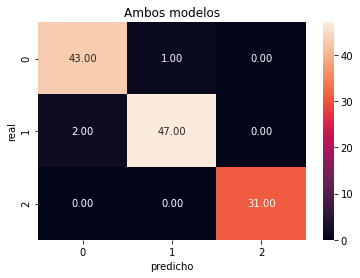

In [ ]:
g = sns.heatmap(confusion_matrix(Y_train,np.argmax(combines_predicted_proba,axis=1)+1),annot=True, fmt='.2f')
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('Ambos modelos')

Text(0.5, 1.0, 'GaussianNB')

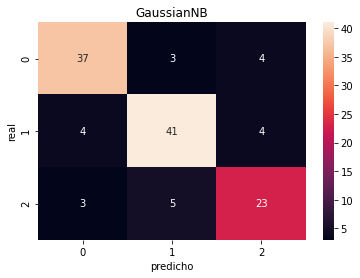

In [ ]:
g = sns.heatmap(confusion_matrix(Y_train,gnb.predict(X_train.loc[:,columns_cont])),annot=True)
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('GaussianNB')

Text(0.5, 1.0, 'MultinomialNB')

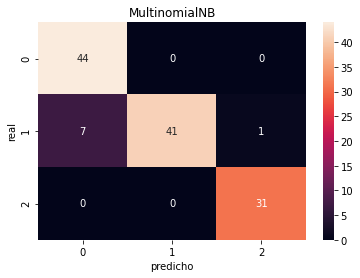

In [ ]:
g = sns.heatmap(confusion_matrix(Y_train,mnb.predict(X_train.loc[:,columns_to_discretize])),annot=True)
g.set_xlabel('predicho')
g.set_ylabel('real')
g.set_title('MultinomialNB')